In [8]:
import melanoma as mel

%matplotlib inline
%load_ext autoreload
%autoreload -p 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

rootpath = '/hpcstor6/scratch01/s/sanghyuk.kim001'
img_size = (224, 224) # height, width
utilInstance = mel.Util(rootpath, img_size)

directoryPath = rootpath + '/melanomaDB/Kaggle_malignant_benign_DB'

benign_train_img = f'{directoryPath}/train/benign'
malignant_train_img = f'{directoryPath}/train/malignant'
benign_test_img = f'{directoryPath}/test/benign'
malignant_test_img = f'{directoryPath}/test/malignant'

x_train, y_train, x_val, y_val, X_test, Y_test = \
    utilInstance.loadDatasetFromDirectory(benign_train_img, malignant_train_img, benign_test_img, malignant_test_img)



Reloading 'melanoma.util'.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████████████████████████████████████████████████████████████████████| 300/300 [00:04<00:00, 72.78it/s]


In [9]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  200,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  10.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.2, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.2, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = Adam(lr=0.001),
			loss='binary_crossentropy',
			metrics=['accuracy'],
			callbacks = [red_lr],

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
base_model = mel.CNN(CFG=CFG)

model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on Kaggle DB',
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
)

2023-12-28 00:21:42.729975: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-12-28 00:21:42.859597: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-12-28 00:21:42.859654: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-12-28 00:21:42.864722: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-28 00:21:42.864765: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-12-28 00:21:42.866215: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

2023-12-28 00:21:45.413906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-12-28 00:21:45.432757: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-12-28 00:21:48.471532: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-12-28 00:21:49.095097: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-12-28 00:21:49.749827: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-12-28 00:21:49.749850: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-12-28 00:21:49.749918: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-28 00:21:49.790187: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-12-28 00:21:50.593196: I tensorflow/stream_exec

 1/25 [>.............................] - ETA: 2:20 - loss: 0.8885 - accuracy: 0.5469

2023-12-28 00:21:51.318517: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


25/25 [==============================] - 22s 657ms/step - loss: 0.5487 - accuracy: 0.7457 - val_loss: 0.3830 - val_accuracy: 0.8330


/home/sanghyuk.kim001/anaconda3/envs/clean_chimera_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/200
25/25 [==============================] - 14s 549ms/step - loss: 0.4028 - accuracy: 0.8144 - val_loss: 0.3242 - val_accuracy: 0.8450
Epoch 3/200
25/25 [==============================] - 14s 558ms/step - loss: 0.3592 - accuracy: 0.8423 - val_loss: 0.3247 - val_accuracy: 0.8520
Epoch 4/200
25/25 [==============================] - 14s 546ms/step - loss: 0.3282 - accuracy: 0.8570 - val_loss: 0.3040 - val_accuracy: 0.8620
Epoch 5/200
25/25 [==============================] - 14s 552ms/step - loss: 0.3208 - accuracy: 0.8595 - val_loss: 0.2886 - val_accuracy: 0.8680
Epoch 6/200
25/25 [==============================] - 14s 547ms/step - loss: 0.2961 - accuracy: 0.8646 - val_loss: 0.3064 - val_accuracy: 0.8640
Epoch 7/200
25/25 [==============================] - 14s 547ms/step - loss: 0.2911 - accuracy: 0.8760 - val_loss: 0.3005 - val_accuracy: 0.8600
Epoch 8/200
25/25 [==============================] - 14s 549ms/step - loss: 0.2802 - accuracy: 0.8722 - val_loss: 0.2889 - val_accuracy:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

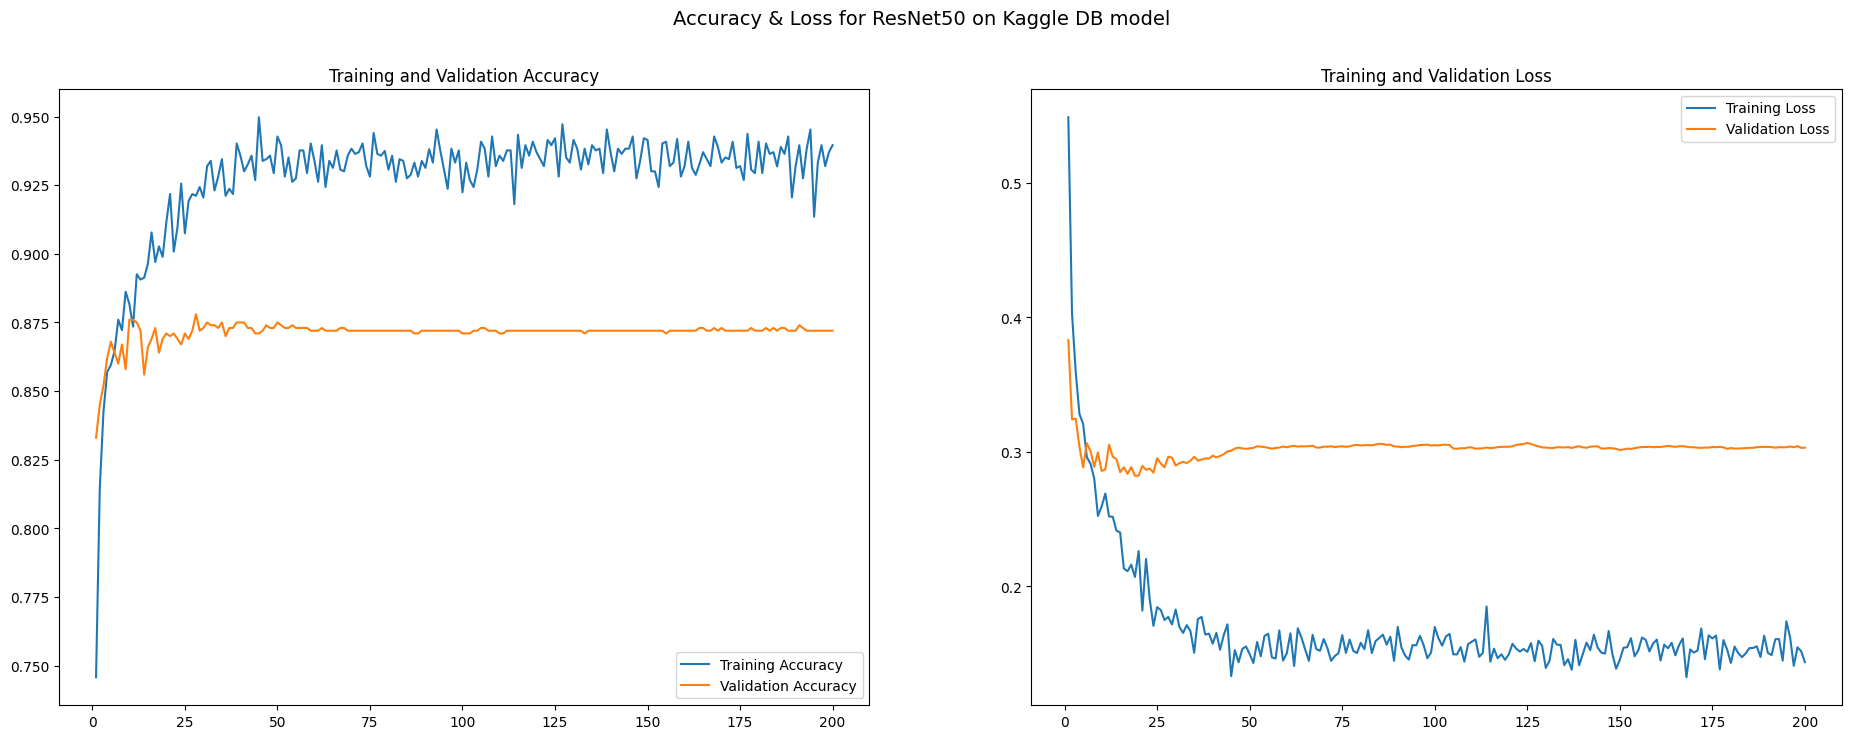

In [11]:
visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = 'ResNet50 on Kaggle DB')

visualizer.visualize_performance(
    model_name = 'ResNet50 on Kaggle DB',
    history = history
)

In [12]:
# Testing model on test data to evaluate
from sklearn.metrics import accuracy_score
lists=[]
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        lists.append(1)
    else:
        lists.append(0)
        
print(accuracy_score(Y_test, lists))

0.8803030303030303


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

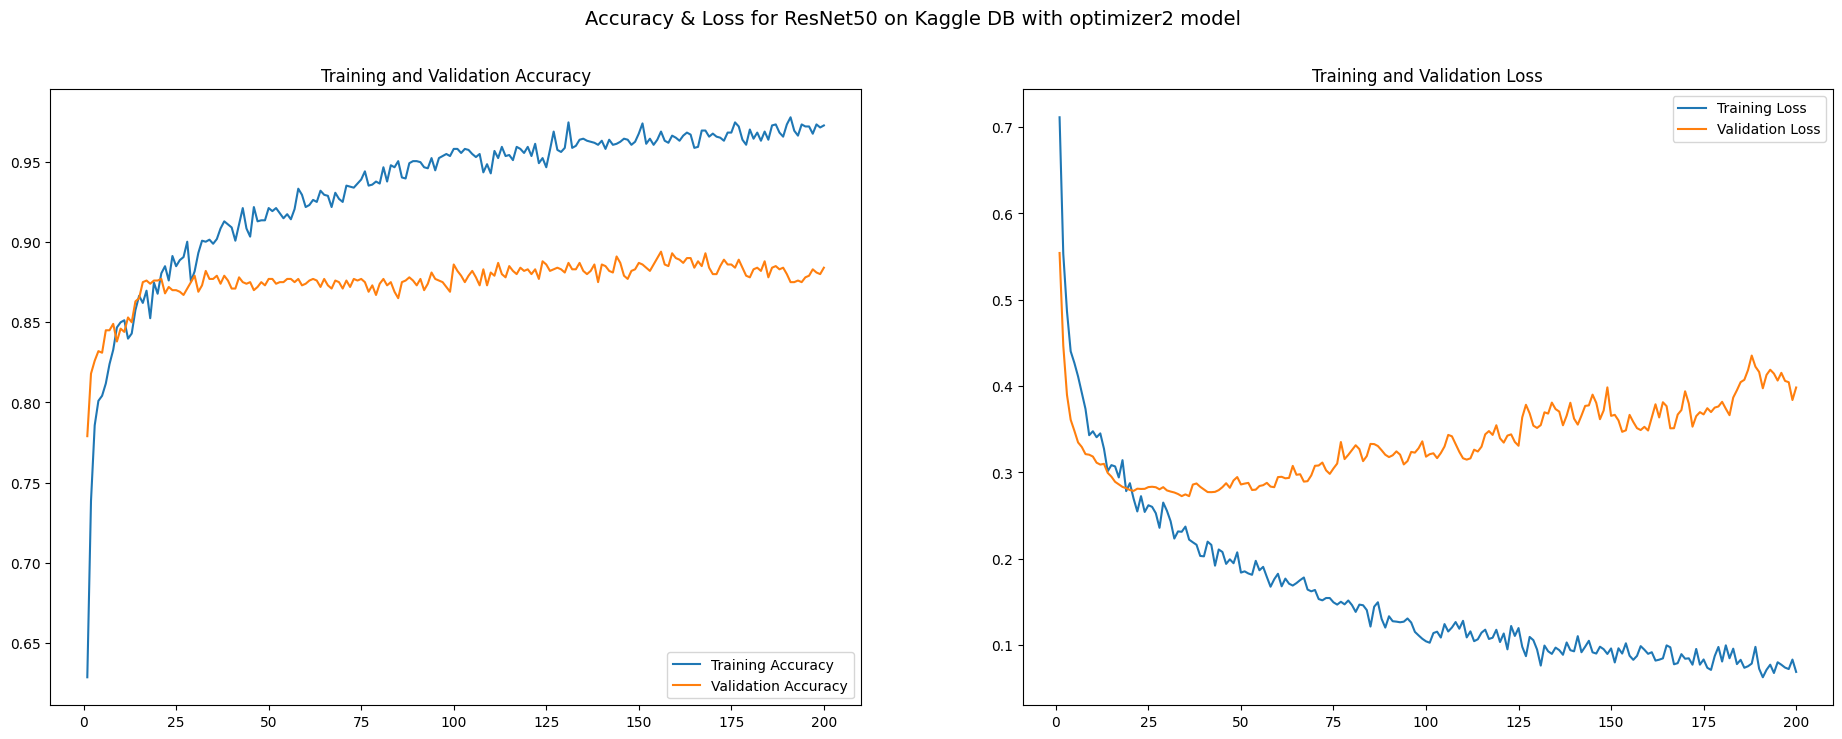

0.8848484848484849


In [16]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import EarlyStopping

img_height, img_width = utilInstance.getImgSize()

optimizer1 = Adam(lr=0.001)
optimizer2 = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
red_lr= ReduceLROnPlateau(monitor='val_accuracy', patience=3 , verbose=1, factor=0.7)
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 20)

CFG = dict(
			batch_size            =  64,   # 8; 16; 32; 64; bigger batch size => moemry allocation issue
			epochs                =  200,   # 5; 10; 20;
			last_trainable_layers =   0,
			verbose               =   1,   # 0; 1
			fontsize              =  14,
			num_classes           =  2, # binary

			# Images sizes
			img_height = img_height,   # Original: (450h, 600w)
            img_width = img_width,

			# Images augs
			ROTATION_RANGE        =  10.0,
			ZOOM_RANGE            =   0.1,
			HSHIFT_RANGE          =   0.2, # randomly shift images horizontally
			WSHIFT_RANGE          =   0.2, # randomly shift images vertically
			HFLIP                 = False, # randomly flip images
			VFLIP                 = False, # randomly flip images

			# Model settings
			pretrained_weights = 'imagenet',
			model_optimizer = optimizer2,
			loss='binary_crossentropy',
			metrics=['accuracy'],
			callbacks = [],

			# Postprocessing
			stopper_patience      =  10,   # 0.01; 0.05; 0.1; 0.2;
			run_functions_eagerly = False,
            
            # save
            snapshot_path = '/hpcstor6/scratch01/s/sanghyuk.kim001/snapshot'
		)

base_model = mel.CNN(CFG=CFG)

model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on Kaggle DB with optimizer2',
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
)

visualizer = mel.Visualizer()
visualizer.visualize_model(model = model, model_name = 'ResNet50 on Kaggle DB with optimizer2')

visualizer.visualize_performance(
    model_name = 'ResNet50 on Kaggle DB with optimizer2',
    history = history
)

# Testing model on test data to evaluate
from sklearn.metrics import accuracy_score
lists=[]
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i][0]>0.5:
        lists.append(1)
    else:
        lists.append(0)
        
print(accuracy_score(Y_test, lists))

In [17]:
base_model = mel.CNN(CFG=CFG)

model = base_model.myresnet50()

history = base_model.fit_model(    
    model = model,
    model_name = 'ResNet50 on Kaggle DB',
    trainimages = x_train,
    trainlabels = y_train,
    validationimages = x_val,
    validationlabels = y_val,
)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)              

KeyboardInterrupt: 